## Section 2: Machine Learning Development

## **Customer Segmentation**

## Recency, Frequency, Monetary (RFM) Analysis

**Customer segmentation** is a crucial marketing tool that allows businesses to understand their target audience better. By segmenting customers, businesses can gain insights into their behaviors and tailor marketing efforts and communications more effectively for each segment.

### What is RFM Analysis?

RFM analysis is a technique used to segment customers based on three key factors:

1. **Recency (R)**: How recently a customer made their last purchase. This is measured by the difference between the date of their last purchase and the current date.
  
2. **Frequency (F)**: How often a customer makes a purchase. This counts the total number of transactions made by each customer.
  
3. **Monetary (M)**: How much a customer has spent. This measures the total spending of each customer over a specific period.

By evaluating these three factors, businesses can categorize customers into segments, enabling more personalized marketing strategies and customer relationship management.

In [1]:
import pandas as pd
import plotly.express as px
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"D:\DATA SCIENCE ZONE\Company Tasks\SNS Data Scientist Task\Dataset\olist\final_df.csv")

In [4]:
df

,order_id,customer_id,customer_unique_id,order_purchase_date,order_status,order_estimated_delivery_date,order_delivered_customer_date,payment_value,customer_zip_code_prefix,customer_city,...,seller_id,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_creation_date,delivered_before_expected,delivered_after_expected,delivered_on_expected
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,delivered,2017-10-18,2017-10-10,38.71,3149,sao paulo,...,3504c0cb71d7fa48d967e0e4c94d59d9,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,True,False,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,delivered,2018-08-13,2018-08-07,141.46,47813,barreiras,...,289cdb325fb7e7f891c38608bf9e0962,31570,belo horizonte,SP,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08,True,False,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,delivered,2018-09-04,2018-08-17,179.12,75265,vianopolis,...,4869f7a5dfa277a7dca6462dcf3b52b2,14840,guariba,SP,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18,True,False,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,delivered,2017-12-15,2017-12-02,72.20,59296,sao goncalo do amarante,...,66922902710d126a0e7d26b0e3805106,31842,belo horizonte,MG,359d03e676b3c069f62cadba8dd3f6e8,5.0,2017-12-03,True,False,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,delivered,2018-02-26,2018-02-16,28.62,9195,santo andre,...,2c9e548be18521d1c43cde1c582c6de8,8752,mogi das cruzes,SP,e50934924e227544ba8246aeb3770dd4,5.0,2018-02-17,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112364,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58,delivered,2018-03-02,2018-02-28,195.00,11722,praia grande,...,1f9ab4708f3056ede07124aad39a2554,17602,tupa,SP,29bb71b2760d0f876dfa178a76bc4734,4.0,2018-03-01,True,False,False
112365,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43,delivered,2017-09-27,2017-09-21,271.01,45920,nova vicosa,...,d50d79cb34e38265a8649c383dcffd48,8290,sao paulo,SP,371579771219f6db2d830d50805977bb,5.0,2017-09-22,True,False,False
112366,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,delivered,2018-02-15,2018-01-25,441.16,28685,japuiba,...,a1043bafd471dff536d0c462352beb48,37175,ilicinea,MG,8ab6855b9fe9b812cd03a480a25058a1,2.0,2018-01-26,True,False,False
112367,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,delivered,2018-02-15,2018-01-25,441.16,28685,japuiba,...,a1043bafd471dff536d0c462352beb48,37175,ilicinea,MG,8ab6855b9fe9b812cd03a480a25058a1,2.0,2018-01-26,True,False,False


In [5]:
df.dtypes

order_id                          object
customer_id                       object
customer_unique_id                object
order_purchase_date               object
order_status                      object
order_estimated_delivery_date     object
order_delivered_customer_date     object
payment_value                    float64
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_item_id                      int64
product_id                        object
price                            float64
freight_value                    float64
product_category_name_english     object
seller_id                         object
seller_zip_code_prefix             int64
seller_city                       object
seller_state                      object
review_id                         object
review_score                     float64
review_creation_date              object
delivered_before_expected           bool
delivered_after_

In [6]:
# Handle any non-standard formats and convert to datetime
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_purchase_date'] = pd.to_datetime(df['order_purchase_date'])

In [7]:
df.dtypes

order_id                                 object
customer_id                              object
customer_unique_id                       object
order_purchase_date              datetime64[ns]
order_status                             object
order_estimated_delivery_date    datetime64[ns]
order_delivered_customer_date    datetime64[ns]
payment_value                           float64
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_item_id                             int64
product_id                               object
price                                   float64
freight_value                           float64
product_category_name_english            object
seller_id                                object
seller_zip_code_prefix                    int64
seller_city                              object
seller_state                             object
review_id                               

In [8]:
# get our last order transaction
last= df['order_purchase_date'].max()
last


Timestamp('2018-09-03 09:06:57')

In [9]:
#observed day = + 1 days since last transactions
timebound = last + timedelta(days=1)
timebound

Timestamp('2018-09-04 09:06:57')

In [10]:
# total unique customer id
df['customer_unique_id'].nunique()

94720

In [11]:
#calculate RFM metrics
df_rfm = df.groupby('customer_unique_id').agg({
    'order_purchase_date' : lambda x : (timebound- x.max()).days,
    'order_id' : 'count',
    'payment_value' : 'sum'})

In [12]:
#rename the column for easy interpretation
df_rfm.reset_index(inplace=True)
df_rfm.rename(columns= {'order_purchase_date': 'Recency',
                        'order_id': 'Frequency',
                        'payment_value': 'Monetary Value'},inplace= True)

In [13]:
df_rfm

,customer_unique_id,Recency,Frequency,Monetary Value
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89
...,...,...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,452,2,4134.84
94716,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58
94717,ffff371b4d645b6ecea244b27531430a,573,1,112.46
94718,ffff5962728ec6157033ef9805bacc48,124,1,133.69


In [14]:
rfm= df_rfm[['Recency', 'Frequency', 'Monetary Value']]
rfm

,Recency,Frequency,Monetary Value
0,116,1,141.90
1,119,1,27.19
2,542,1,86.22
3,326,1,43.62
4,293,1,196.89
...,...,...,...
94715,452,2,4134.84
94716,267,1,84.58
94717,573,1,112.46
94718,124,1,133.69


In [15]:
rfm1= rfm.copy()
rfm1

,Recency,Frequency,Monetary Value
0,116,1,141.90
1,119,1,27.19
2,542,1,86.22
3,326,1,43.62
4,293,1,196.89
...,...,...,...
94715,452,2,4134.84
94716,267,1,84.58
94717,573,1,112.46
94718,124,1,133.69


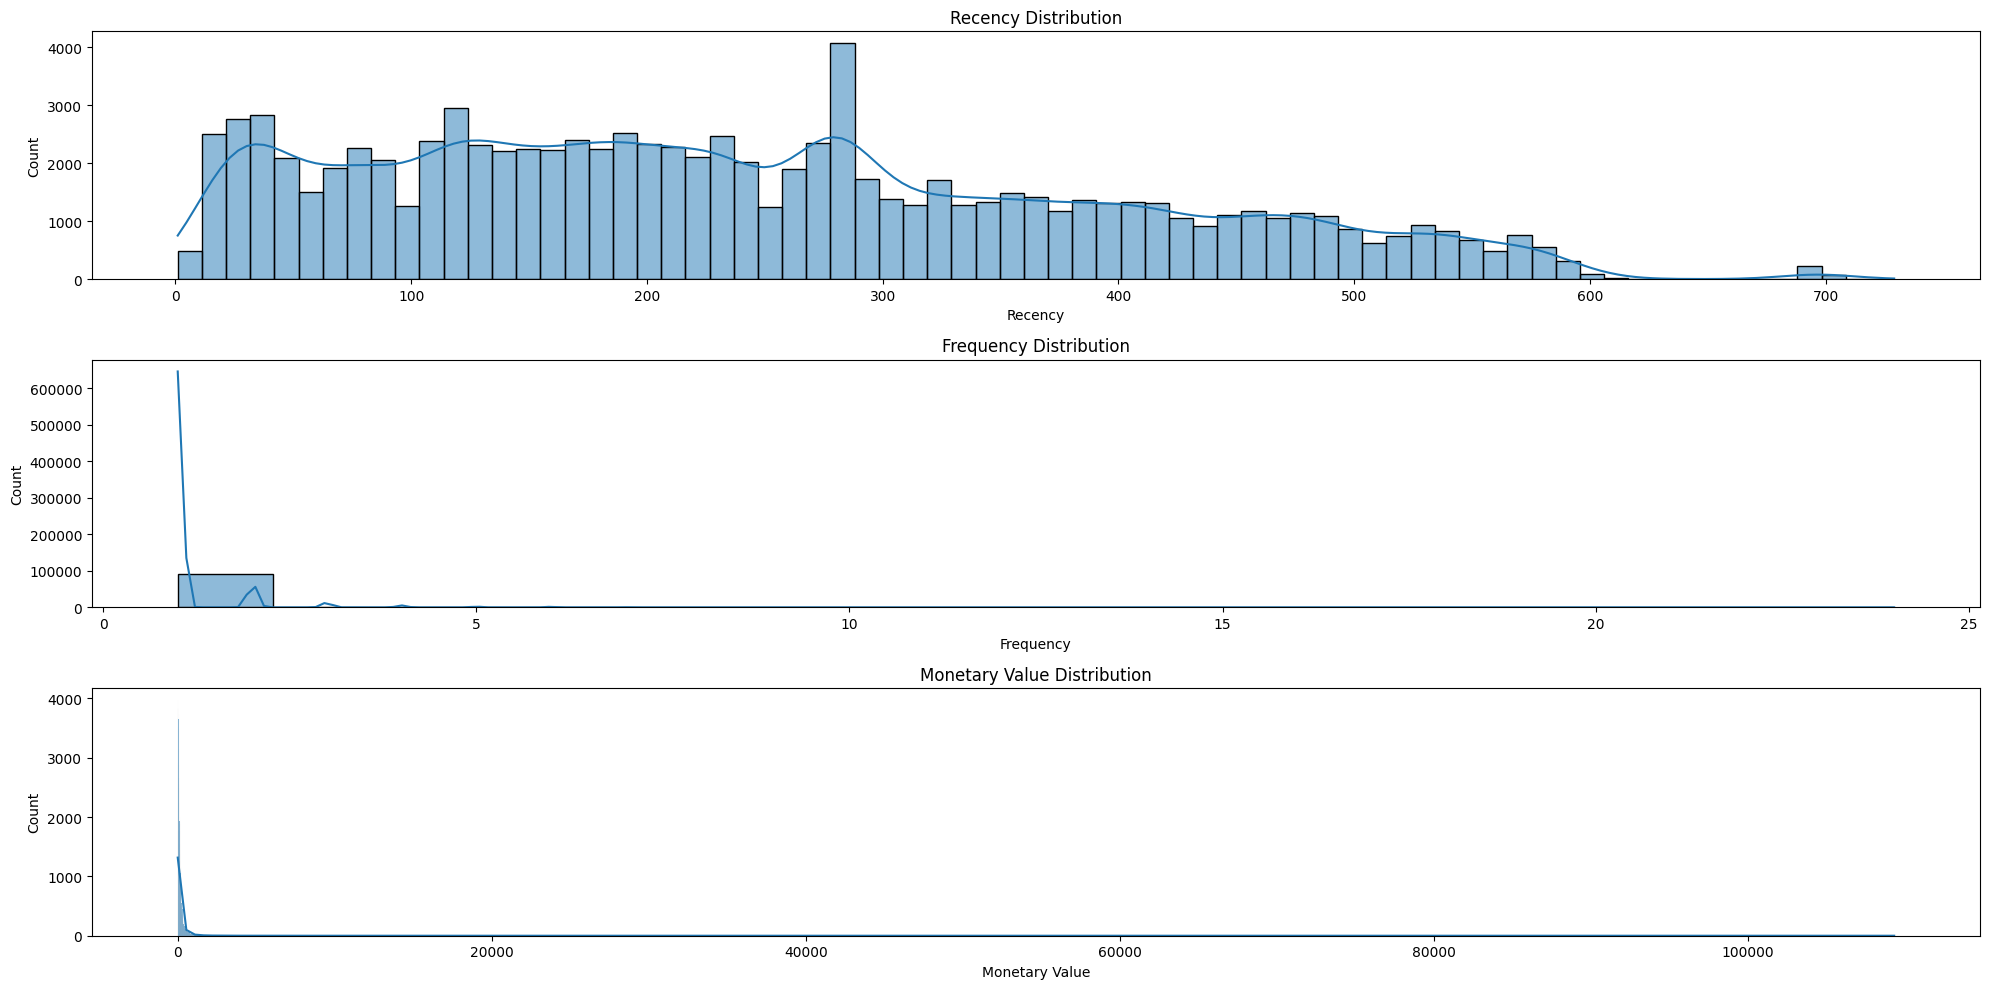

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10))

# Plotting Recency distribution
sns.histplot(rfm1['Recency'], kde=True, ax=axes[0])
axes[0].set_title('Recency Distribution')

# Plotting Frequency distribution
sns.histplot(rfm1['Frequency'], kde=True, ax=axes[1])
axes[1].set_title('Frequency Distribution')

# Plotting Monetary Value distribution
sns.histplot(rfm1['Monetary Value'], kde=True, ax=axes[2])
axes[2].set_title('Monetary Value Distribution')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


From the chart above, we can observe that the variable is skewed. To address this, we will apply a log transformation to unskew only the monetary value.

In [17]:
#unskew the data with data transformations
rfm1['Monetary Value']= np.log(rfm1['Monetary Value'])

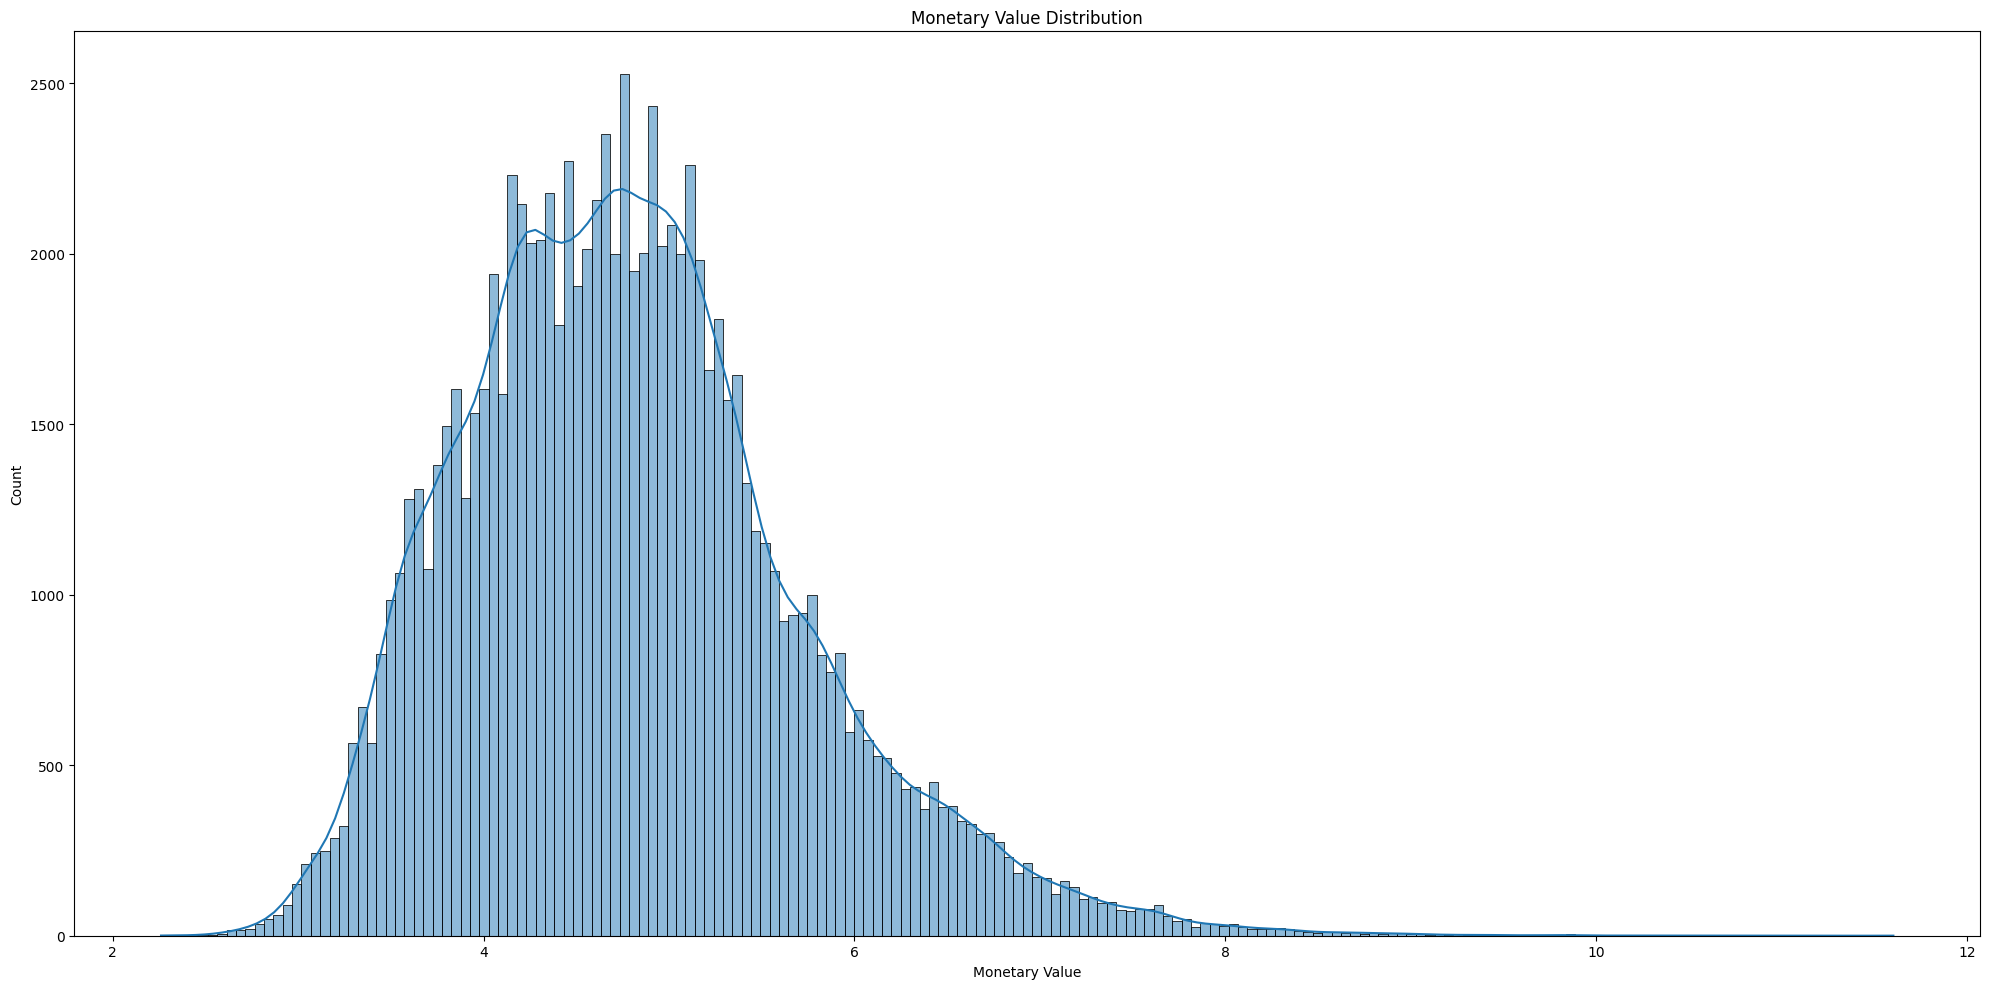

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plotting Monetary Value distribution
sns.histplot(rfm1['Monetary Value'], kde=True, ax=ax)
ax.set_title('Monetary Value Distribution')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [19]:
rfm1

,Recency,Frequency,Monetary Value
0,116,1,4.955123
1,119,1,3.302849
2,542,1,4.456902
3,326,1,3.775516
4,293,1,5.282645
...,...,...,...
94715,452,2,8.327204
94716,267,1,4.437698
94717,573,1,4.722598
94718,124,1,4.895524


In [20]:
# copy of log transformation
df_log = rfm1.copy()

In [21]:
#using StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_log)
#normalize the variables
df_normalized = scaler.transform(df_log)

In [22]:
# store for clustering
df_normalized = pd.DataFrame(data= df_normalized, index= rfm1.index, columns = rfm1.columns)
df_normalized

,Recency,Frequency,Monetary Value
0,-0.832041,-0.288126,0.165046
1,-0.812454,-0.288126,-1.635992
2,1.949311,-0.288126,-0.378032
3,0.539048,-0.288126,-1.120768
4,0.323591,-0.288126,0.522058
...,...,...,...
94715,1.361702,1.258213,3.840739
94716,0.153837,-0.288126,-0.398966
94717,2.151710,-0.288126,-0.088414
94718,-0.779809,-0.288126,0.100081


To determine clusters we will use :
- Elbow Method

#### Elbow Method

In [23]:
#Fit k-means and calculate SSE for eack k
sse= {}
for k in range(1,7):
  kmeans= KMeans(n_clusters=k)
  kmeans.fit(df_normalized)
  sse[k] = kmeans.inertia_


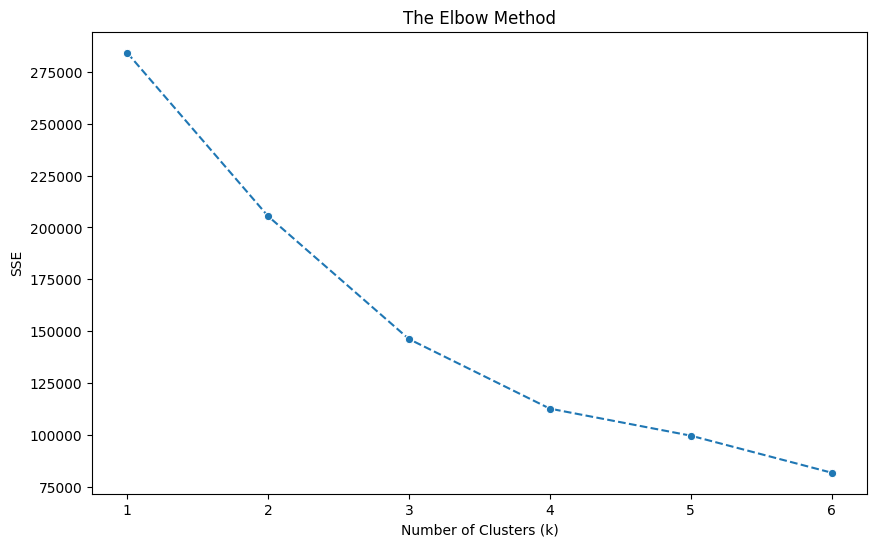

{1: 284159.9999999987, 2: 205433.40366552057, 3: 146227.86523400544, 4: 112701.53814709476, 5: 99689.8037981189, 6: 81833.64160363754}


In [24]:
# Create a DataFrame from the SSE dictionary
sse_df = pd.DataFrame({
    'Number of Clusters': list(sse.keys()),
    'SSE': list(sse.values())
})

# Plot SSE for each k using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=sse_df, x='Number of Clusters', y='SSE', marker='o', linestyle='--')

# Customize plot
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.xticks(ticks=sse_df['Number of Clusters'])  # Ensure all k values are shown on x-axis

# Show the plot
plt.show()

# Print the SSE values
print(sse)


### Elbow Method for Determining Optimal Clusters

The plot above illustrates the Sum of Squared Errors (SSE) for different numbers of clusters. As the number of clusters increases, the SSE decreases, indicating improved clustering. The "elbow" point, where the rate of decrease slows significantly, suggests the optimal number of clusters. Based on the plot:

- **3 Clusters**: Provides a good balance between reducing SSE and maintaining simplicity.
- **4 Clusters**: Offers slightly more granularity with diminished additional improvements in SSE.

Choosing between 3 and 4 clusters depends on the desired balance between model simplicity and detail.


# Applying K-Means Clustering

In [25]:
kmeans = KMeans(n_clusters=3,random_state= 5)
kmeans.fit(df_normalized)
cluster_labels = kmeans.labels_

In [26]:
len(cluster_labels)

94720

In [27]:
len(df_rfm)

94720

In [28]:
#assign the label to raw data
df_rfm['Cluster'] = cluster_labels

In [29]:
df_rfm

,customer_unique_id,Recency,Frequency,Monetary Value,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,0
2,0000f46a3911fa3c0805444483337064,542,1,86.22,2
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2
...,...,...,...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,452,2,4134.84,1
94716,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58,0
94717,ffff371b4d645b6ecea244b27531430a,573,1,112.46,2
94718,ffff5962728ec6157033ef9805bacc48,124,1,133.69,0


In [30]:
result = df_rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary Value']].agg(['mean', 'median'])
result

Recency        Frequency        Monetary Value         
               mean median      mean median           mean   median
Cluster                                                            
0        134.502914  136.0  1.021408    1.0     134.528410   99.740
1        228.221741  214.0  2.481193    2.0     824.162112  459.080
2        398.326585  386.0  1.034022    1.0     142.339561  101.025

### Customer Segmentation Based on RFM Analysis

**Cluster 0: Recent Low Spenders**
- **Recency:** Customers have purchased recently.
- **Frequency:** Customers purchase infrequently.
- **Monetary Value:** Customers spend relatively less.

**Cluster 1: Frequent High Spenders**
- **Recency:** Customers have not purchased recently.
- **Frequency:** Customers make frequent purchases.
- **Monetary Value:** Customers spend a lot.

**Cluster 2: Inactive Low Spenders**
- **Recency:** Customers have not purchased in a long time.
- **Frequency:** Customers purchase infrequently.
- **Monetary Value:** Customers spend relatively less.


### Insights and Recommendations Based on RFM Analysis

#### **1. Cluster 0: Recent Low Spenders**

**Insights:**
- **Recency:** Recent purchases indicate current engagement.
- **Frequency:** Low purchase frequency suggests potential for growth.
- **Monetary Value:** Relatively low spending compared to other clusters.

**Recommendations:**
- **Targeted Promotions:** Offer discounts or promotions to encourage more frequent purchases.
- **Personalized Offers:** Provide recommendations based on recent purchases to increase spend per visit.
- **Loyalty Programs:** Introduce loyalty rewards to boost retention and frequency.

#### **2. Cluster 1: Frequent High Spenders**

**Insights:**
- **Recency:** Recent inactivity but high past engagement.
- **Frequency:** Frequent purchases demonstrate strong loyalty.
- **Monetary Value:** High spenders, indicating willingness to invest.

**Recommendations:**
- **Re-Engagement Campaigns:** Use exclusive offers or new product launches to rekindle interest.
- **VIP Programs:** Implement a VIP loyalty program with special privileges.
- **Upsell and Cross-Sell:** Utilize their purchase history to offer complementary products.

#### **3. Cluster 2: Inactive Low Spenders**

**Insights:**
- **Recency:** Long period of inactivity.
- **Frequency:** Rare purchases, suggesting low engagement.
- **Monetary Value:** Low spending, potentially due to budget or interest constraints.

**Recommendations:**
- **Reactivation Campaigns:** Use targeted marketing to encourage return purchases.
- **Customer Feedback:** Gather insights on why they became inactive and address issues.
- **Incentivize First Purchase:** Offer significant discounts or incentives for their next purchase.

### Summary of Recommendations:
- **Increase Engagement:** For recent low spenders, focus on improving purchase frequency and average order value with promotions and loyalty programs.
- **Reignite Interest:** For frequent high spenders, bring them back with exclusive offers and VIP programs.
- **Reactivation Strategies:** For inactive low spenders, employ reactivation campaigns and gather feedback to boost their spending.

Implementing these strategies will enhance customer engagement, retention, and revenue across different segments.